In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import houseprice_functions as hpf

In [2]:
cleaned_hp = pd.read_csv('data/cleaned_hp')
cleaned_hp_2 = pd.read_csv('data/sunny_clean1.csv')
HousePrices = pd.read_csv('data/train.csv')
cleaned_hp = cleaned_hp.merge(cleaned_hp_2,left_index = True,right_index = True)
y = np.log(HousePrices[['SalePrice']])
x = cleaned_hp.drop('Id',axis = 1)
cleaned_hp.sample(5)

,CentralAir,HeatingQC,garage_score,Heating,Electrical,GarageArea,TotalBsmtSF,finishedbsmt,2Types,Basment,...,MasVnrType,RoofMatl,SaleCondition,MoSold,YrSold,EnclosedPorch,YearRemodAdd,Ext_Score,OverallScore,Total_PorchDeckSF
672,1,3,6,1,5,546,1208,0.634934,0,0,...,0,1,0,6,2006,0,1977,7,12,240
1296,1,4,6,1,5,525,1120,0.692857,0,0,...,1,1,0,12,2008,123,1963,7,11,212
1175,1,5,6,1,5,541,1683,0.415924,0,0,...,1,1,0,4,2007,0,2000,7,13,33
1313,1,5,6,1,5,779,1393,0.000000,0,0,...,1,1,0,5,2010,0,1999,7,14,698
614,1,5,0,1,5,0,630,1.000000,0,0,...,0,1,0,5,2010,0,1972,6,10,120


In [52]:
ols = linear_model.LinearRegression()
ols.fit(x,y)
print("beta_1: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x) - y) ** 2))
print("R^2: %.5f" % ols.score(x, y))

beta_1: [[ 0.056  0.031  0.004 -0.059 -0.004  0.     0.     0.051 -0.243 -0.009
   0.142 -0.167 -0.123 -0.045 -0.047 -0.049  0.026 -0.02  -0.084  0.002
  -0.01   0.     0.001  0.031  0.066  0.   ]]
beta_0: [27.214]
RSS: 51.86
R^2: 0.77724


In [ ]:
col_beta = list(zip(cleaned_hp.columns,np.round(ols.coef_,3)[0]))
df = pd.DataFrame(col_beta, columns = ['Variable', 'Beta'])
df.head()

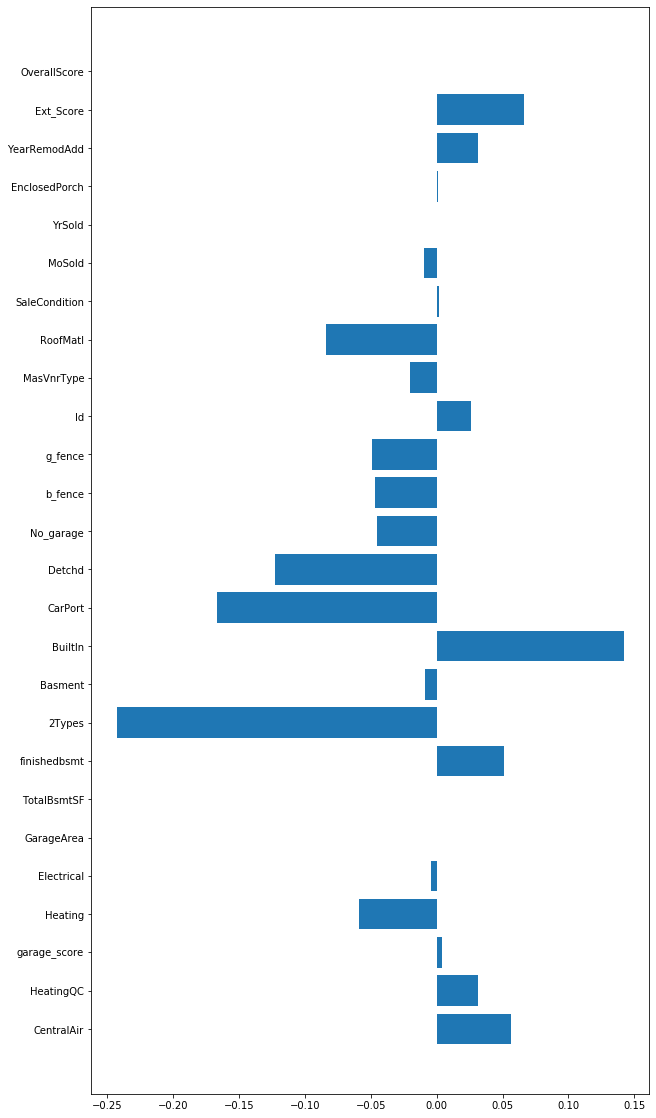

In [54]:
plt.figure(figsize = (10,20) )
plt.barh(df.Variable,df.Beta)
plt.show()

In [ ]:
import seaborn as sns


# Investigating Outliers

In [4]:
hpf.outliers(cleaned_hp,cleaned_hp[['TotalBsmtSF']],num_sd = 1,method = 'outlier_df',operator = 'any')

,CentralAir,HeatingQC,garage_score,Heating,Electrical,GarageArea,TotalBsmtSF,finishedbsmt,2Types,Basment,BuiltIn,CarPort,Detchd,No_garage,b_fence,g_fence
6,1.0,5.0,6.0,1.0,5.0,636.0,1686.0,0.811981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,1.0,3.0,6.0,1.0,5.0,516.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
22,1.0,5.0,6.0,1.0,5.0,534.0,1777.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,1.0,5.0,6.0,1.0,5.0,890.0,1566.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1.0,5.0,6.0,1.0,5.0,772.0,1704.0,0.714789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,1.0,3.0,6.0,1.0,5.0,550.0,539.0,0.788497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1440,1.0,2.0,6.0,1.0,5.0,672.0,588.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1448,0.0,4.0,5.0,1.0,5.0,384.0,560.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1451,1.0,5.0,6.0,1.0,5.0,840.0,1573.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
